In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from sklearn import linear_model
from torch.utils.data import Dataset, DataLoader
from torch import nn,optim
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv("train - train.csv")

# take a look at the dataset
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [3]:
train_dataset = df
print("Print the training dataset:\n ", train_dataset)

Print the training dataset:
        battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0               842     0          2.2         0   1.0     0.0         7.0   
1              1021     1          0.5         1   0.0     1.0        53.0   
2               563     1          0.5         1   2.0     1.0        41.0   
3               615     1          2.5         0   0.0     0.0        10.0   
4              1821     1          1.2         0  13.0     1.0        44.0   
...             ...   ...          ...       ...   ...     ...         ...   
1995            794     1          0.5         1   0.0     1.0         2.0   
1996           1965     1          2.6         1   0.0     0.0        39.0   
1997           1911     0          0.9         1   1.0     1.0        36.0   
1998           1512     0          0.9         0   4.0     1.0        46.0   
1999            510     1          2.0         1   5.0     1.0        45.0   

      m_dep  mobile_wt  n_cores  

In [4]:
df = pd.read_csv("test - test.csv")

# take a look at the dataset
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
validation_dataset = df
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
         id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35

In [6]:
# Define softmax classifier class

class SoftMax(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.double()
        
    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

In [7]:
# Set input size and output size

input_dim = 20
output_dim = 4

In [8]:
model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=20, out_features=4, bias=True)
)


In [9]:
# Print the parameters

print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([4, 20])
b:  torch.Size([4])


In [10]:
learning_rate = 0.1
optimizer = optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.MSELoss()

In [11]:
data = np.asanyarray(train_dataset[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']])
target = np.asanyarray(train_dataset[['price_range']])
data_test = np.asanyarray(validation_dataset[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']])

In [12]:
## for NaN values in dataset
for i in range(2000):
    for j in range(20):
        if (pd.isna(data[i][j]) == True):
            data[i] = 0
            target[i] = 0
        
print(data[157])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
data = preprocessing.normalize(data)
target = preprocessing.normalize(target)
data_test = preprocessing.normalize(data_test)

In [14]:
class Data(Dataset):
    def __init__(self):
            self.x=torch.tensor(data)
            self.y=torch.tensor(target)
            self.len=self.x.shape[0]

    def __getitem__(self,index):

        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [15]:
train_dataset = Data()
train_dataset[19][0].shape

torch.Size([20])

In [16]:
train_loader = DataLoader(dataset=train_dataset,batch_size = 10)

In [17]:
# Train the model

n_epochs = 10
loss_list = []
accuracy_list = []

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z,y)
            loss.backward()
            optimizer.step()
        loss_list.append(loss.data)


In [18]:
train_model(n_epochs)

C:\Users\Mohamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


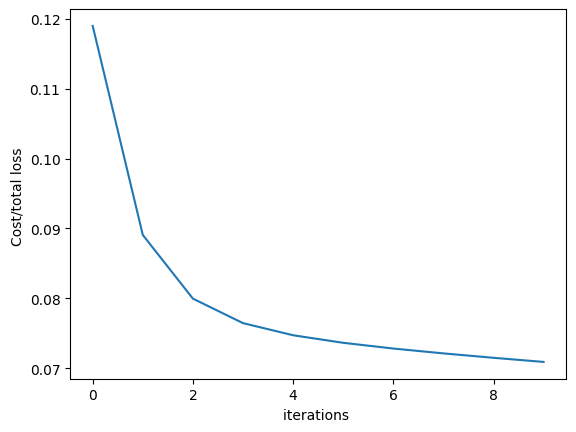

In [19]:
plt.plot(loss_list)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

In [26]:
for i in range(10) :
    z = model(torch.tensor(data_test[i]))
    print(z)
    _, yhat = torch.max(z.data, 0)
    print(yhat)

tensor([0.9532, 0.9573, 0.9505, 0.9524], dtype=torch.float64,
       grad_fn=<AddBackward0>)
tensor(1)
tensor([1.1109, 1.1036, 1.0958, 1.1004], dtype=torch.float64,
       grad_fn=<AddBackward0>)
tensor(0)
tensor([0.7816, 0.7748, 0.7887, 0.7849], dtype=torch.float64,
       grad_fn=<AddBackward0>)
tensor(2)
tensor([0.9072, 0.9158, 0.9138, 0.9146], dtype=torch.float64,
       grad_fn=<AddBackward0>)
tensor(1)
tensor([0.7976, 0.7923, 0.8037, 0.7998], dtype=torch.float64,
       grad_fn=<AddBackward0>)
tensor(2)
tensor([1.0038, 1.0003, 0.9989, 0.9986], dtype=torch.float64,
       grad_fn=<AddBackward0>)
tensor(0)
tensor([0.9820, 0.9770, 0.9845, 0.9839], dtype=torch.float64,
       grad_fn=<AddBackward0>)
tensor(2)
tensor([0.5912, 0.5880, 0.5927, 0.5951], dtype=torch.float64,
       grad_fn=<AddBackward0>)
tensor(3)
tensor([1.0595, 1.0582, 1.0546, 1.0574], dtype=torch.float64,
       grad_fn=<AddBackward0>)
tensor(0)
tensor([0.1863, 0.1942, 0.1809, 0.1792], dtype=torch.float64,
       grad